In [1]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
# 데이터 다운로드
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data( num_words=1000)

In [16]:
X_test

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 2, 394, 354, 4, 123, 9, 2, 2, 2, 10, 10, 13, 92, 124, 89, 488, 2, 100, 28, 2, 14, 31, 23, 27, 2, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 2, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 2, 6, 176, 7, 2, 88, 12, 2, 23, 2, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 2, 2, 4, 2, 2, 109, 2, 21, 4, 22, 2, 8, 6, 2, 2, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 2, 5, 2, 2, 45, 55, 221, 15, 670, 2, 526, 14, 2, 4, 405, 5, 2, 7, 27, 85, 108, 131, 4, 2, 2, 2, 405, 9, 2, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 2, 2, 45, 407, 31, 7, 41, 2, 105, 21, 59, 299, 12, 38, 950, 5, 2, 15, 45, 629, 488, 2, 127, 6, 52, 292, 17, 4, 2, 185, 132, 2, 2, 2, 488, 2, 47, 6, 392, 173, 4, 2, 2, 270, 2, 4, 2, 7, 4, 65, 55, 73, 11, 346, 14, 20, 9, 6, 976, 2, 7, 2, 861, 2, 5, 2, 30, 2, 2, 56, 4, 841, 5, 990, 692, 8, 4, 2, 398, 229, 10,

In [18]:
# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
        return results

In [19]:
X_train = one_hot_sequences(X_train)
X_test = one_hot_sequences(X_test)

In [20]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers

In [21]:
# 신경망 모델 구축
inputs = Input(shape=1000,)

x = Dense(32, activation='relu')(inputs)
x = Dense(24, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = layers.Dropout(0.3)(x) # 드롭아웃으로 노드 비활성화
prediction = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=prediction)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# 신경망 훈련, 검증 데이터 전달, 조기종료 적용
early_stopping = EarlyStopping()
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test), callbacks = [early_stopping], verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6931 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000 - 1s/epoch - 25ms/step
Epoch 2/20
49/49 - 1s - loss: 0.6931 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.5000 - 697ms/epoch - 14ms/step
Epoch 3/20
49/49 - 1s - loss: 0.6931 - accuracy: 0.4971 - val_loss: 0.6932 - val_accuracy: 0.5000 - 706ms/epoch - 14ms/step


In [23]:
# 신경망 훈련, 검증 데이터 전달, 조기종료 적용 X
early_stopping = EarlyStopping()
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test), verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6931 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.5000 - 925ms/epoch - 19ms/step
Epoch 2/20
49/49 - 1s - loss: 0.6931 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.5000 - 654ms/epoch - 13ms/step
Epoch 3/20
49/49 - 1s - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.5000 - 821ms/epoch - 17ms/step
Epoch 4/20
49/49 - 1s - loss: 0.6931 - accuracy: 0.4959 - val_loss: 0.6932 - val_accuracy: 0.5000 - 588ms/epoch - 12ms/step
Epoch 5/20
49/49 - 1s - loss: 0.6931 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.5000 - 650ms/epoch - 13ms/step
Epoch 6/20
49/49 - 1s - loss: 0.6931 - accuracy: 0.5012 - val_loss: 0.6932 - val_accuracy: 0.5000 - 843ms/epoch - 17ms/step
Epoch 7/20
49/49 - 1s - loss: 0.6931 - accuracy: 0.4974 - val_loss: 0.6932 - val_accuracy: 0.5000 - 669ms/epoch - 14ms/step
Epoch 8/20
49/49 - 1s - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6932 - val_accuracy: 0.5000 - 773ms/epoch - 16ms/step
Epoch 9/

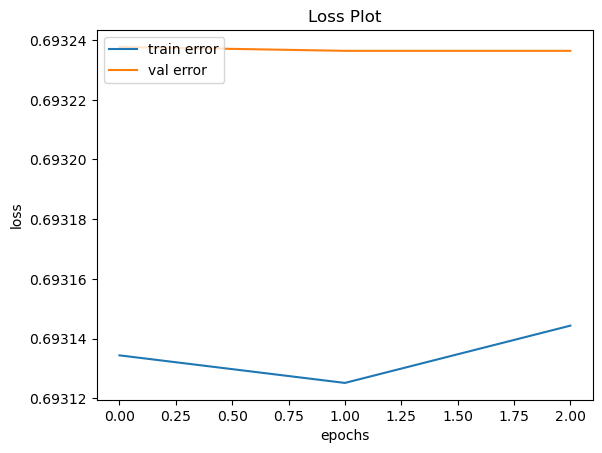

In [27]:
# 훈련 데이터와 손실값의 검증 데이터의 손실값을 그래프에 출력, 조기종료 적용
history_dict = history.history
loss_values = history_dict['loss'] # 훈련 데이터 손실 값
val_loss_values = history_dict['val_loss'] # 검증 데이터 손실 값
acc = history_dict['accuracy'] # 정확도
epochs = range(1, len(acc) + 1) # 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

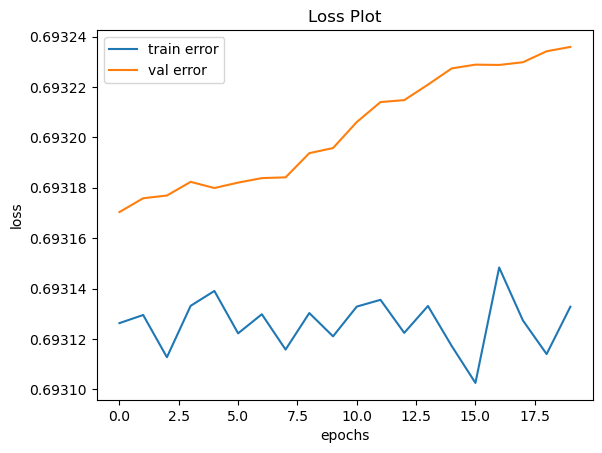

In [24]:
# 훈련 데이터와 손실값의 검증 데이터의 손실값을 그래프에 출력, 조기종료 적용 X
history_dict = history.history
loss_values = history_dict['loss'] # 훈련 데이터 손실 값
val_loss_values = history_dict['val_loss'] # 검증 데이터 손실 값
acc = history_dict['accuracy'] # 정확도
epochs = range(1, len(acc) + 1) # 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()